In [1]:
from fastai.callbacks import *

In [2]:
from fastaidev import *          # Quick access to most common functionality
from fastaidev.collab import *   # Quick access to collab filtering functionality

In [3]:
plt.style.use(['dark_background'])

## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [4]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/home/jupyter/workspace/course-v3/nbs/dl1/ac-dl1/data/movie_lens_sample')

In [5]:
ratings = pd.read_csv(path/'ratings.csv')
series2cat(ratings, 'userId', 'movieId')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [6]:
learn = get_collab_learner(ratings, n_factors=50, min_score=0., max_score=5., callback_fns=[ShowGraph,CSVLogger])

Total time: 00:08
epoch  train_loss  valid_loss
1      2.470578    2.368623    (00:00)
2      1.501768    0.728563    (00:00)
3      0.834915    0.674138    (00:00)
4      0.679147    0.655529    (00:00)
5      0.594356    0.642206    (00:00)
6      0.546822    0.632725    (00:00)
7      0.494260    0.635946    (00:00)
8      0.453743    0.639050    (00:00)
9      0.424181    0.638839    (00:00)
10     0.405182    0.638995    (00:00)



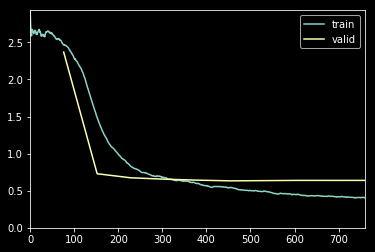

In [7]:
learn.fit_one_cycle(10, 5e-3)